In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [165]:
users = pd.read_csv("../data/user_targets.csv")
playlists = pd.read_csv("../data/df_playlists.csv")

In [166]:
FEATURES = ["openness", "conscientiousness", "extraversion", 
             "agreeableness", "neuroticism"]
GENRES = ["pop", "local", "rock", "altern", "indie"]
USERS_ATTR = ["id_owner", *FEATURES]
PLAYLISTS_ATTR = ["id_owner", *GENRES]

In [167]:
# filter for necessary attributes
users = users[USERS_ATTR]
playlists = playlists[PLAYLISTS_ATTR]

# merge datasets and aggregate to a per-user level
merged = pd.merge(users, playlists)
merged = merged.groupby("id_owner").mean()

In [168]:
X = merged[FEATURES]

# find the column name of the top genre
y = merged[GENRES].idxmax(axis=1)

In [169]:
# pop is the most common top genre, so it may be biased towards pop
merged[GENRES].mean()

pop       0.408332
local     0.274934
rock      0.286736
altern    0.115134
indie     0.114047
dtype: float64

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [171]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predicted = rfc.predict(X_test)
score = accuracy_score(y_test, predicted)
print(f"Accuracy Score: {score:.2f}")

Accuracy Score: 0.51


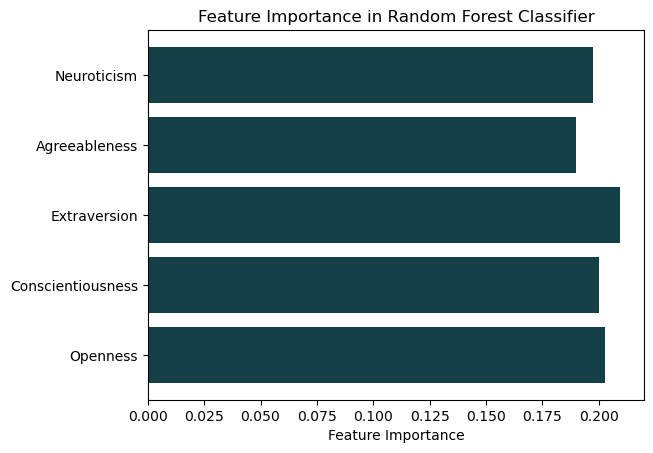

In [172]:
feature_importances = rfc.feature_importances_
ylabels = [f.title() for f in FEATURES]

plt.barh(ylabels, feature_importances, color="#134046")
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()